In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

Loading the Data

In [4]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

Exploratory Data Analysis

In [5]:
train_df.head()

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.0
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2833 non-null   object 
 1   date        2833 non-null   object 
 2   Item Id     2833 non-null   object 
 3   Item Name   2489 non-null   object 
 4   ad_spend    1382 non-null   float64
 5   anarix_id   2833 non-null   object 
 6   unit_price  2833 non-null   float64
dtypes: float64(2), object(5)
memory usage: 155.1+ KB


In [8]:
train_df['date'] = pd.to_datetime(train_df['date'])

In [9]:
test_df['date'] = pd.to_datetime(test_df['date'])

In [10]:
train_df.isnull().sum()

,0
ID,0
date,0
Item Id,2
Item Name,1832
ad_spend,24187
anarix_id,0
units,17898
unit_price,0


Replacing the Null values of ad_spend and units with value 0;

In [11]:
train_df['ad_spend'].fillna(0, inplace=True)
test_df['ad_spend'].fillna(0, inplace=True)

In [12]:
train_df['units'].fillna(0, inplace=True)

In [13]:
# Extract the part after the underscore in the 'ID' column
train_df['Item Id'] = train_df.apply(lambda row: row['ID'].split('_')[1] if pd.isna(row['Item Id']) else row['Item Id'], axis=1)


In [14]:
train_df.isnull().sum()

,0
ID,0
date,0
Item Id,0
Item Name,1832
ad_spend,0
anarix_id,0
units,0
unit_price,0


In [15]:
train_df['anarix_id'].nunique(), test_df['anarix_id'].nunique()


(1, 1)

In [16]:
# If all the values in a column of a dataset are the same, that column does not provide any useful information for building a predictive model

train_df = train_df.drop('anarix_id', axis=1)
test_df = test_df.drop('anarix_id', axis=1)


In [17]:
missing_item_name_df = train_df[train_df['Item Name'].isnull()]
missing_item_name_df

,ID,date,Item Id,Item Name,ad_spend,units,unit_price
57040,2023-08-20_B0CFV6V981,2023-08-20,B0CFV6V981,NaN,0.00,0.0,0.00
57298,2023-08-21_B0CFV6V981,2023-08-21,B0CFV6V981,NaN,0.00,0.0,0.00
57479,2023-08-22_B0CFV6V981,2023-08-22,B0CFV6V981,NaN,0.00,0.0,0.00
57655,2023-08-23_B0CFV6V981,2023-08-23,B0CFV6V981,NaN,0.00,7.0,0.00
57826,2023-08-24_B0CFV6V981,2023-08-24,B0CFV6V981,NaN,0.00,4.0,0.00
...,...,...,...,...,...,...,...
101485,2024-05-31_B0CR4BGLK5,2024-05-31,B0CR4BGLK5,NaN,604.73,0.0,0.00
101486,2024-05-31_B0CR4BG4ZW,2024-05-31,B0CR4BG4ZW,NaN,261.21,2.0,225.32
101487,2024-05-31_B0CR49NR3B,2024-05-31,B0CR49NR3B,NaN,0.00,0.0,0.00
101488,2024-05-31_B0CR49N6MQ,2024-05-31,B0CR49N6MQ,NaN,0.00,0.0,0.00


Filling the missing value of Item Name

In [18]:
# Create a dictionary to map item IDs to item names
item_dict = {}
for index, row in train_df.iterrows():
  if not pd.isna(row['Item Name']):
    item_dict[row['Item Id']] = row['Item Name']


for index, row in train_df.iterrows():
  if pd.isna(row['Item Name']):
    item_id = row['Item Id']
    if item_id in item_dict:
      train_df.at[index, 'Item Name'] = item_dict[item_id]
    else:
      new_item_name = 'item' + str(len(item_dict) + 1)
      item_dict[item_id] = new_item_name
      train_df.at[index, 'Item Name'] = new_item_name


for index, row in test_df.iterrows():
  if pd.isna(row['Item Name']):
    item_id = row['Item Id']
    if item_id in item_dict:
      test_df.at[index, 'Item Name'] = item_dict[item_id]
    else:
      new_item_name = 'item' + str(len(item_dict) + 1)
      item_dict[item_id] = new_item_name
      test_df.at[index, 'Item Name'] = new_item_name


print(train_df['Item Name'].isnull().sum())
print(test_df['Item Name'].isnull().sum())


0
0


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          101490 non-null  object        
 1   date        101490 non-null  datetime64[ns]
 2   Item Id     101490 non-null  object        
 3   Item Name   101490 non-null  object        
 4   ad_spend    101490 non-null  float64       
 5   units       101490 non-null  float64       
 6   unit_price  101490 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 5.4+ MB


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          2833 non-null   object        
 1   date        2833 non-null   datetime64[ns]
 2   Item Id     2833 non-null   object        
 3   Item Name   2833 non-null   object        
 4   ad_spend    2833 non-null   float64       
 5   unit_price  2833 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 132.9+ KB


In [21]:
item_name_counts = train_df['Item Name'].value_counts()

In [22]:
item_name_counts

,count
Item Name,
"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",781
"NapQueen 12 Inch Bamboo Charcoal Queen Size Medium Firm Memory Foam Mattress, Bed in a Box",781
"NapQueen Elsa 8"" Innerspring Mattress, Full",781
"NapQueen Margaret 12"" Charcoal Memory Foam Mattress, Twin",781
"NapQueen Margaret 8"" Charcoal Memory Foam Mattress, Twin",781
"NapQueen Margaret 8"" Charcoal Memory Foam Mattress, Full",781
"NapQueen Margaret 10"" Charcoal Memory Foam Mattress, Queen",781
"NapQueen Elsa 6"" Innerspring Mattress, Full",781
"NapQueen Margaret 8"" Charcoal Memory Foam Mattress, Queen",781


Visualizations

Text(0, 0.5, 'Frequency')

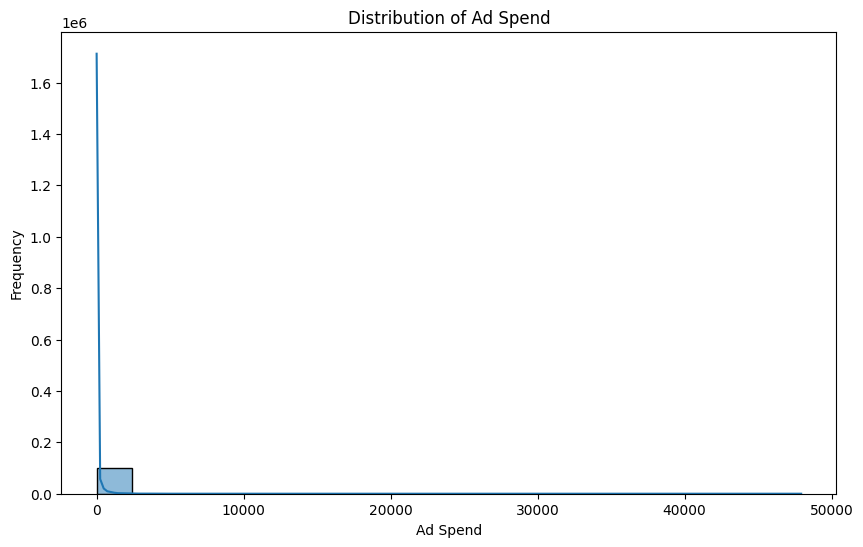

In [23]:

plt.figure(figsize=(10, 6))
sns.histplot(train_df['ad_spend'], bins=20, kde=True)
plt.title('Distribution of Ad Spend')
plt.xlabel('Ad Spend')
plt.ylabel('Frequency')


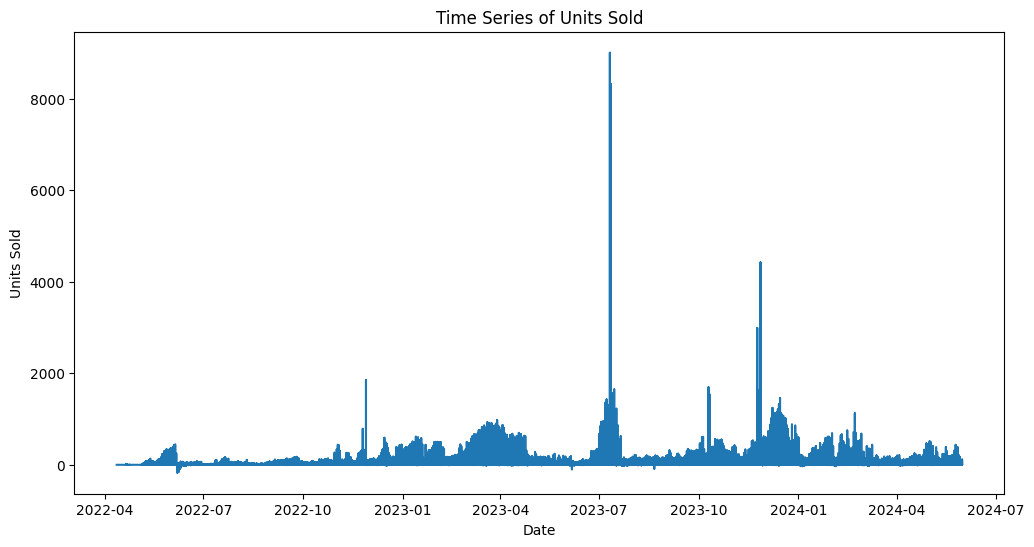

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(train_df['date'], train_df['units'])
plt.title('Time Series of Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

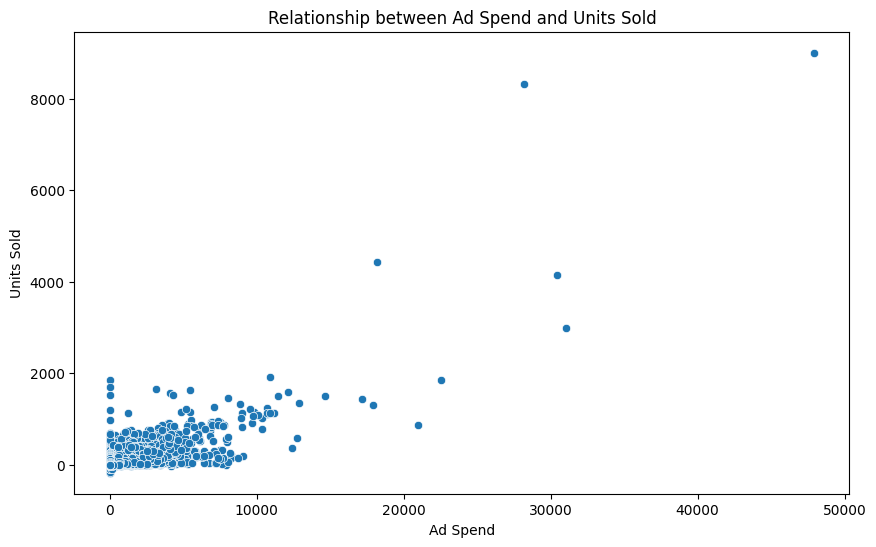

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ad_spend', y='units', data=train_df)
plt.title('Relationship between Ad Spend and Units Sold')
plt.xlabel('Ad Spend')
plt.ylabel('Units Sold')
plt.show()


In [48]:


# Select numerical columns
numerical_cols = train_df.select_dtypes(include=['float', 'int']).columns

# Calculate correlation matrix
correlation_matrix = train_df[numerical_cols].corr()

# Display correlation matrix
print(correlation_matrix)


            ad_spend     units  unit_price
ad_spend    1.000000  0.744530    0.054472
units       0.744530  1.000000    0.095063
unit_price  0.054472  0.095063    1.000000


Feature Engineering and Data Preparation

In [26]:

# Prepare data
X = train_df.drop('units', axis=1)
y = train_df['units']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature engineering
X_train['dayofweek'] = X_train['date'].dt.dayofweek
X_val['dayofweek'] = X_val['date'].dt.dayofweek
X_train['month'] = X_train['date'].dt.month
X_val['month'] = X_val['date'].dt.month

Model Building

In [33]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train[['ad_spend', 'dayofweek', 'month']], y_train)
lr_predictions = lr_model.predict(X_val[['ad_spend', 'dayofweek', 'month']])
lr_mse = mean_squared_error(y_val, lr_predictions, squared=False)
print("Linear Regression MSE:", lr_mse)

Linear Regression MSE: 28.960617597218867


In [34]:
# Model 2: ARIMA

arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1)
arima_mse = mean_squared_error(y_val, arima_predictions, squared=False)
print("ARIMA MSE:", arima_mse)

ARIMA MSE: 35.54837540811726


In [35]:

# Model 3: Prophet
from prophet import Prophet

prophet_train_df = pd.DataFrame({
    'ds': X_train['date'],
    'y': y_train
})

prophet_model = Prophet()
prophet_model.fit(prophet_train_df)

prophet_future = prophet_model.make_future_dataframe(periods=len(y_val), freq='D')

prophet_forecast = prophet_model.predict(prophet_future)
prophet_predictions = prophet_forecast['yhat'][-len(y_val):]

prophet_mse = mean_squared_error(y_val, prophet_predictions, squared=False)
print("Prophet MSE:", prophet_mse)




INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiqmn7b0i/nx2re6pk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiqmn7b0i/ng5kmpme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45869', 'data', 'file=/tmp/tmpiqmn7b0i/nx2re6pk.json', 'init=/tmp/tmpiqmn7b0i/ng5kmpme.json', 'output', 'file=/tmp/tmpiqmn7b0i/prophet_modelkfssxrp4/prophet_model-20240802101923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:19:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MSE: 540.8034458172431


In [36]:
# Model 4: SARIMA (Seasonal ARIMA)
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(y_train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 7))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1)

sarima_mse = mean_squared_error(y_val, sarima_predictions, squared=False)
print("SARIMA MSE:", sarima_mse)

SARIMA MSE: 35.54873175835581


In [41]:


# Model 3: LSTM (Long Short-Term Memory)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Scale the data
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = scaler.transform(y_val.values.reshape(-1, 1))

X_train_reshaped = y_train_scaled[:-1].reshape(y_train_scaled.shape[0]-1, 1, 1)
X_val_reshaped = y_val_scaled[:-1].reshape(y_val_scaled.shape[0]-1, 1, 1)

model = Sequential()
model.add(LSTM(4, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled[1:], epochs=10, batch_size=1, verbose=2)

# Make predictions
lstm_predictions_scaled = model.predict(X_val_reshaped)

# Inverse transform the predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

# Calculate RMSE
lstm_mse = mean_squared_error(y_val.values[1:], lstm_predictions, squared=False)
print("LSTM RMSE:", lstm_mse)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81191/81191 - 197s - 2ms/step - loss: 5.7487e-05
Epoch 2/10
81191/81191 - 202s - 2ms/step - loss: 5.7216e-05
Epoch 3/10
81191/81191 - 201s - 2ms/step - loss: 5.6771e-05
Epoch 4/10
81191/81191 - 201s - 2ms/step - loss: 5.6845e-05
Epoch 5/10
81191/81191 - 202s - 2ms/step - loss: 5.6782e-05
Epoch 6/10
81191/81191 - 202s - 2ms/step - loss: 5.6806e-05
Epoch 7/10
81191/81191 - 201s - 2ms/step - loss: 5.6653e-05
Epoch 8/10
81191/81191 - 202s - 2ms/step - loss: 5.6643e-05
Epoch 9/10
81191/81191 - 203s - 2ms/step - loss: 5.6744e-05
Epoch 10/10
81191/81191 - 203s - 2ms/step - loss: 5.6609e-05
635/635 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
LSTM RMSE: 35.647016223199046


Out of all the models we have used we got better mean squared error value of 29.9 in Linear Regression, we use this model to predict the number of units sold in test data

In [42]:
test_df['dayofweek'] = test_df['date'].dt.dayofweek
test_df['month'] = test_df['date'].dt.month

test_predictions = lr_model.predict(test_df[['ad_spend', 'dayofweek', 'month']])

submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'units': test_predictions
})

submission_df.to_csv('submission.csv', index=False)
